In [1]:
import os, sys
import json
import pandas as pd
from wordcloud import WordCloud

# Generate a basic preliminary dataset

In [2]:
academia_1 = "What does it mean for a clustering to be fair? One popular approach seeks to ensure that each cluster contains groups in (roughly) the same proportion in which they exist in the population. The normative principle at play is balance: any cluster might act as a representative of the data, and thus should reflect its diversity.But clustering also captures a different form of representativeness. A core principle in most clustering problems is that a cluster center should be representative of the cluster it represents, by being close to the points associated with it. This is so that we can effectively replace the points by their cluster centers without significant loss in fidelity, and indeed is a common use case for clustering. For such a clustering to be fair, the centers should represent different groups equally well. We call such a clustering a group-representative clustering.In this paper, we study the structure and computation of group-representative clusterings. We show that this notion naturally parallels the development of fairness notions in classification, with direct analogs of ideas like demographic parity and equal opportunity. We demonstrate how these notions are distinct from and cannot be captured by balance-based notions of fairness. We present approximation algorithms for group representative k-median clustering and couple this with an empirical evaluation on various real-world data sets. We also extend this idea to facility location, motivated by the current problem of assigning polling locations for voting"
academia_2 = "There has been recent interest by payers, health care systems, and researchers in the development of machine learning and artificial intelligence models that predict an individual's probability of developing opioid use disorder. The scores generated by these algorithms can be used by physicians to tailor the prescribing of opioids for the treatment of pain, reducing or foregoing prescribing to individuals deemed to be at high risk, or increasing prescribing for patients deemed to be at low risk. This paper constructs a machine learning algorithm to predict opioid use disorder risk using commercially available claims data similar to those utilized in the development of proprietary opioid use disorder prediction algorithms. We study risk scores generated by the machine learning model in a setting with quasi-experimental variation in the likelihood that doctors prescribe opioids, generated by changes in the legal structure for monitoring physician prescribing. We find that machine-predicted risk scores do not appear to correlate at all with the individual-specific heterogeneous treatment effect of receiving opioids. The paper identifies a new source of algorithmic unfairness in machine learning applications for health care and precision medicine, arising from the researcher's choice of objective function. While precision medicine should guide physician treatment decisions based on the heterogeneous causal impact of a course of treatment for an individual, allocating treatments to individuals receiving the most benefit and recommending caution for those most likely to experience harmful side effects, ML models in health care are often trained on proxies like individual baseline risk, and are not necessarily informative in deciding who would most benefit, or be harmed, by a course of treatment."
industry_1 = "Counterfactual explanations are gaining prominence within technical, legal, and business circles as a way to explain the decisions of a machine learning model. These explanations share a trait with the long-established principal reason explanations required by U.S. credit laws: they both explain a decision by highlighting a set of features deemed most relevant---and withholding others.These feature-highlighting explanations have several desirable properties: They place no constraints on model complexity, do not require model disclosure, detail what needed to be different to achieve a different decision, and seem to automate compliance with the law. But they are far more complex and subjective than they appear.In this paper, we demonstrate that the utility of feature-highlighting explanations relies on a number of easily overlooked assumptions: that the recommended change in feature values clearly maps to real-world actions, that features can be made commensurate by looking only at the distribution of the training data, that features are only relevant to the decision at hand, and that the underlying model is stable over time, monotonic, and limited to binary outcomes.We then explore several consequences of acknowledging and attempting to address these assumptions, including a paradox in the way that feature-highlighting explanations aim to respect autonomy, the unchecked power that feature-highlighting explanations grant decision makers, and a tension between making these explanations useful and the need to keep the model hidden.While new research suggests several ways that feature-highlighting explanations can work around some of the problems that we identify, the disconnect between features in the model and actions in the real world---and the subjective choices necessary to compensate for this---must be understood before these techniques can be usefully implemented."
industry_2 = "As machine learning becomes increasingly incorporated within high impact decision ecosystems, there is a growing need to understand the long-term behaviors of deployed ML-based decision systems and their potential consequences. Most approaches to understanding or improving the fairness of these systems have focused on static settings without considering long-term dynamics. This is understandable; long term dynamics are hard to assess, particularly because they do not align with the traditional supervised ML research framework that uses fixed data sets. To address this structural difficulty in the field, we advocate for the use of simulation as a key tool in studying the fairness of algorithms. We explore three toy examples of dynamical systems that have been previously studied in the context of fair decision making for bank loans, college admissions, and allocation of attention. By analyzing how learning agents interact with these systems in simulation, we are able to extend previous work, showing that static or single-step analyses do not give a complete picture of the long-term consequences of an ML-based decision system. We provide an extensible open-source software framework for implementing fairness-focused simulation studies and further reproducible research, available at https://github.com/google/ml-fairness-gym."
academia = [academia_1, academia_2]
industry = [industry_1, industry_2]

# Constructed Dataset

In [3]:
path = "data/"
industry = pd.read_csv(path + "corporate-abstracts.csv")
academia = pd.read_csv(path + 'facct-abstracts.csv')
industry = list(industry['abstract'])
academia = list(academia['abstract'])

# Topic Modeling

In [4]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

academia_clean = [clean(doc).split() for doc in academia]
industry_clean = [clean(doc).split() for doc in industry]

In [5]:
import gensim
from gensim import corpora

/Users/aishwaryamandyam/anaconda3/envs/534/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
academia_dict = corpora.Dictionary(academia_clean)
industry_dict = corpora.Dictionary(industry_clean)
academia_term_matrix = [academia_dict.doc2bow(doc) for doc in academia_clean]
industry_term_matrix = [industry_dict.doc2bow(doc) for doc in industry_clean]

## Word cloud

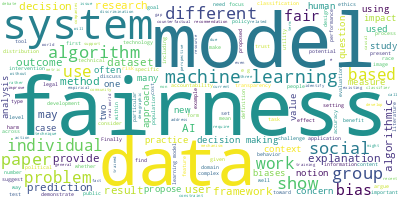

In [7]:
# Academia wordcloud
long_string = ','.join(list(academia))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

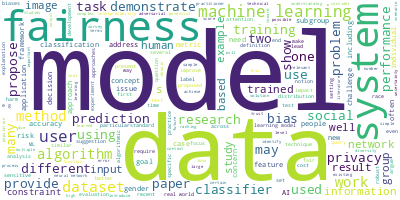

In [8]:
# Industry
long_string = ','.join(list(industry))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

## LDA

In [9]:
# Academia
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(academia_term_matrix, num_topics=5, id2word=academia_dict, passes=50)
print(ldamodel.print_topics(num_topics=5, num_words=3))

[(0, '0.014*"fairness" + 0.011*"system" + 0.008*"decision"'), (1, '0.011*"fairness" + 0.010*"data" + 0.009*"social"'), (2, '0.016*"model" + 0.009*"data" + 0.007*"user"'), (3, '0.015*"explanation" + 0.011*"model" + 0.009*"data"'), (4, '0.011*"bias" + 0.009*"model" + 0.008*"data"')]


In [12]:
# Academia
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(ldamodel, academia_term_matrix, academia_dict, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/aishwaryamandyam/anaconda3/envs/534/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Industry
# Academia
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(industry_term_matrix, num_topics=5, id2word=industry_dict, passes=50)
print(ldamodel.print_topics(num_topics=5, num_words=3))
lda_display = gensimvis.prepare(ldamodel, industry_term_matrix, industry_dict, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/aishwaryamandyam/anaconda3/envs/534/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.011*"model" + 0.011*"data" + 0.009*"privacy"'), (1, '0.016*"learning" + 0.014*"model" + 0.014*"fairness"'), (2, '0.008*"model" + 0.007*"ai" + 0.007*"fairness"'), (3, '0.015*"model" + 0.012*"user" + 0.009*"learning"'), (4, '0.012*"model" + 0.010*"fairness" + 0.008*"constraint"')]
